In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [14]:
df = pd.read_csv('Cars.csv')
print("Dataset shape:", df.shape)
print("Status distribution:\n", df['Status'].value_counts().to_string())
print("\nSample data:\n", df.head().to_string())

Dataset shape: (500, 10)
Status distribution:
 Status
Available    178
Sold         165
Reserved     157

Sample data:
   Car_ID    Brand    Model  Year  Color Engine_Type Transmission     Price  Quantity_In_Stock     Status
0  C0001   Toyota    Camry  2023    Red      Petrol    Automatic  80338.15                  6  Available
1  C0002    Tesla  Model 3  2019    Red    Electric       Manual  26437.73                 16  Available
2  C0003   Nissan  Qashqai  2018   Blue    Electric    Automatic  50158.13                 20  Available
3  C0004  Hyundai   Sonata  2025    Red      Hybrid    Automatic  33026.14                  3  Available
4  C0005   Toyota     RAV4  2016  White      Hybrid       Manual  79672.90                  9   Reserved


In [15]:
df_processed = df.drop('Car_ID', axis=1).copy()
label_encoders = {}
cat_cols = ['Brand', 'Model', 'Color', 'Engine_Type', 'Transmission', 'Status']
for col in cat_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

In [16]:
X = df_processed.drop('Status', axis=1)
y = df_processed['Status']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

In [19]:
results = {}
preds_dict = {}
print("\n" + "="*50)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    preds_dict[name] = y_pred
    print(f"\n{name}: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Available', 'Reserved', 'Sold']))



Logistic Regression: 0.3600
              precision    recall  f1-score   support

   Available       0.36      0.39      0.37        36
    Reserved       0.46      0.39      0.42        31
        Sold       0.29      0.30      0.29        33

    accuracy                           0.36       100
   macro avg       0.37      0.36      0.36       100
weighted avg       0.37      0.36      0.36       100


Decision Tree: 0.3300
              precision    recall  f1-score   support

   Available       0.40      0.44      0.42        36
    Reserved       0.26      0.29      0.27        31
        Sold       0.32      0.24      0.28        33

    accuracy                           0.33       100
   macro avg       0.33      0.33      0.32       100
weighted avg       0.33      0.33      0.33       100


Random Forest: 0.3300
              precision    recall  f1-score   support

   Available       0.36      0.42      0.38        36
    Reserved       0.33      0.32      0.33        31

In [20]:
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False).reset_index(drop=True)
print("\n" + "="*50)
print("MODEL COMPARISON TABLE")
print("-" * 50)
print(results_df.to_string(index=False, float_format='%.4f'))


MODEL COMPARISON TABLE
--------------------------------------------------
              Model  Accuracy
                KNN    0.4200
                SVM    0.3800
Logistic Regression    0.3600
      Decision Tree    0.3300
      Random Forest    0.3300
        Naive Bayes    0.3200


In [21]:
rf_model = models['Random Forest']
feat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nTOP FEATURES (Random Forest)")
print(feat_importance.head(10).to_string(index=False))


TOP FEATURES (Random Forest)
          Feature  Importance
            Price    0.214979
Quantity_In_Stock    0.168206
            Model    0.146978
             Year    0.138011
            Color    0.109025
            Brand    0.099340
      Engine_Type    0.082832
     Transmission    0.040629


In [22]:
best_model_name = results_df.iloc[0]['Model']
best_preds = preds_dict[best_model_name]
cm = confusion_matrix(y_test, best_preds)
print(f"\nCONFUSION MATRIX - {best_model_name} (Acc: {results[best_model_name]:.4f})")
print(cm)


CONFUSION MATRIX - KNN (Acc: 0.4200)
[[22  9  5]
 [11 14  6]
 [16 11  6]]


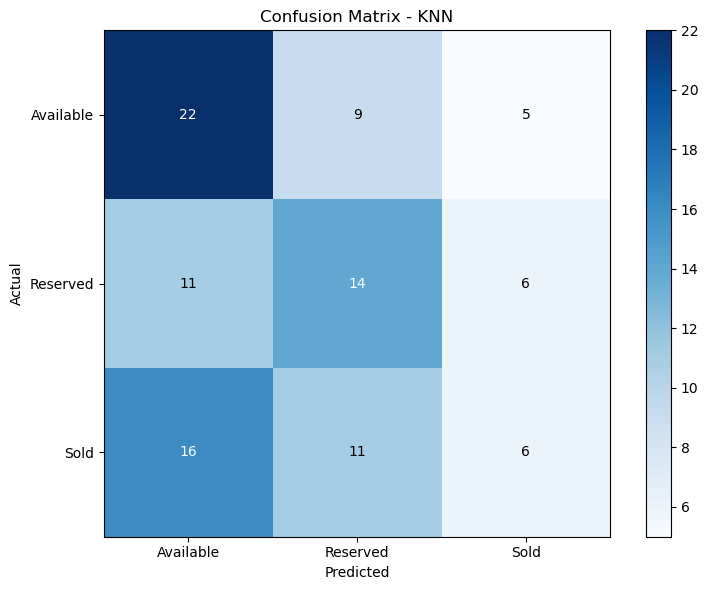

In [23]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.colorbar()
tick_marks = np.arange(3)
plt.xticks(tick_marks, ['Available', 'Reserved', 'Sold'])
plt.yticks(tick_marks, ['Available', 'Reserved', 'Sold'])
for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i,j]>cm.max()/2 else 'black')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [26]:
print(f"\nBEST MODEL: {best_model_name} - {results[best_model_name]:.4f} accuracy")


BEST MODEL: KNN - 0.4200 accuracy
